In [1]:
# 4 - Regressor example

import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


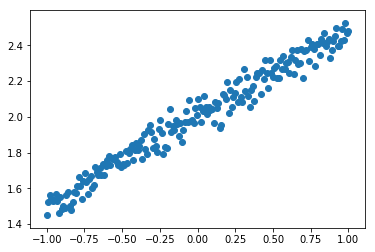

In [2]:
# create some data
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)    # randomize the data
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, ))
# plot data
plt.scatter(X, Y)
plt.show()

In [3]:
X_train, Y_train = X[:160], Y[:160]     # first 160 data points
X_test, Y_test = X[160:], Y[160:]       # last 40 data points

In [4]:
# build a neural network from the 1st layer to the last layer
model = Sequential()

model.add(Dense(units=1, input_dim=1)) 

In [5]:
# choose loss function and optimizing method
model.compile(loss='mse', optimizer='sgd')

In [6]:
# training
print('Training -----------')
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print('train cost: ', cost)

Training -----------
train cost:  4.0225005
train cost:  0.07323862
train cost:  0.00386274
train cost:  0.0026434488


In [7]:
# test
print('\nTesting ------------')
cost = model.evaluate(X_test, Y_test, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)


Testing ------------
40/40 [==============================] - 0s 499us/step
test cost: 0.0031367032788693905
Weights= [[0.4922711]] 
biases= [1.9995022]


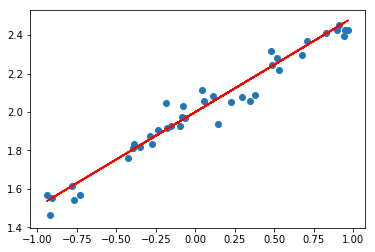

In [9]:
# plotting the prediction
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()

In [ ]:
# ref : https://github.com/MorvanZhou/tutorials/blob/master/kerasTUT/4-regressor_example.py